# Support Vector Machines

A powerful insight is that the linear SVM can be rephrased using the inner product of any two given observations, rather than the observations themselves. The inner product between two vectors is the sum of the multiplication of each pair of input values.

For example, the inner product of the vectors [2, 3] and [5, 6] is 2*5 + 3*6 or 28.

A series of theoretical questions significant in understanding SVMs are:

1. In which situation, will we prefer SVM over Random Forest Algorithm?

    - The performance depends on many factors:
    - Number of training instances
    - Distribution of data
    - Linear vs Non-Linear Problems
    - Input Scale of features
    - Chosen Hyperparameters
    - Validation of the model
In general, It is easier to train a well-performing Random Forest classifier since you have to worry less about hyperparameter optimization. Due to the nature Random Forests, you are less likely to overfit. You simply grow ntrees on n bootstrap samples of the training set on feature subspaces — using the majority vote, the estimate will be pretty robust.

In case of SVM, we have to worry about choosing appropriate kernels (Polynomial, RBF, Linear etc.), the regularisation penalty and strength, kernel parameters such as C and gamma values.

Comparing both the methods needs to be fair and unbiased. You can always choose some 'specific' data to show one of the method outperforms the other. Therefore, strong statistical testing must need to be done to assess the performance across different assortments of datasets. Hence, there cannot be a single winner.

2. Why is SVM an example of Large Margin Classifier?

    - The largest margin is found in order to prevent overfitting by selecting an optimal hyperplane that is at maximum distance from the positive and negative examples (equal distant from the boundary lines.). To satisfy this constraint, and to classify the data points accurately we maximise the margin, which is why it is called a large margin classifier.

3. What is the role of C hyperparameter in Linear SVM kernels?

    - The C hyperparameter is a measure of how much you want to avoid misclassfying a training example. For large values of C, the optimization will choose a smaller margin hyperplane.

    - If C value becomes very small then we get misclassified examples because the optimizer will look for a larger margin hyerplane that cannot even separate linear data properly.

4. What is the intuition behind SVMs?

    - We expect that the new data points should be closer to the training points, in terms of euclidean or any distance metric taken for similarity measurements. The idea is to be able to generalize the pounts in the training data to the corresponding classes. 

    - If however, the test data does not lie close enough to the training data then it might end up being wrongly classified and violate the decision boundary.

    - To prevent this, we ensure that the hyperplane fits the training data such that there is maximum distance between the hyperplane and the data points such that when a new data comes in then it will still be on the correct side of the decision boundary despite being less closer to the training points.

5. What is a kernel in SVM? Why do we use Kernels?

    - SVM algorithms use a set of mathematical functions that are defined as the kernel. The function of the kernel is to take input data and transform them into the required form.

    - Linear, Non-Linear, Polynomial, Radial Basis Function (RBF) and Sigmoid are different types of kernels.

    - The kernel functions return the inner product between two points in a suitable feature space and is applicable to sequence data, graphs, text, images, as well as vecotrs.

    - The most commonly used kernel is RBF because it is localised and has a finite response to all values along the X-axis.

6. Why is the kernel trick not used with Logistic Regression?

    - Classification performance is identical in cases of SVM and Kernel Logistic Regression

    - Kernel Logistic Regression provides classification based on the sum of probabilities of the classes while SVM is more of a deterministic classifier.

    - KLR has a natural extension to multi-class classification whereas in SVM, there are multiple ways to extend it to multi-class classification.

    - KLR also possesses optimal margin properites that SVMs enjoy!

        However, KLR has a few limitations:

    - It is computationally more expensive than SVM
    - The classifier in SVM is designed such that it is defined only in terms of the support vectors, whereas in KLR, the classifier is defined over all the points and not just the support vectors. This allows SVMs to enjoy some natural speed-ups (in terms of efficient code-writing) that is hard to achieve for KLR.

7. What does a high gamma value signify in SVM?

    - The gamma parameter in SVM tunes in the significance of the influence of points in either near or far away from the hyperplane.

    - For a low value of gamma, the model will be too constrained and include all the points in the training dataset, without capturing the shape of the data.

    - For a higher gamma value, we also capture the shape of the data.

     - A higher value of gamma makes the decision boundary a bit irregular as it narrows the shape of the bell curve and thus, we may learn complex features too making it suitable for larger datasets, however excessive increase in gamma values may lead to overfitting.

8. What you mean by generalization error in SVM?

    - Generalization error in statistics is generally the out-of-sample error which is the measure of how accurately a model can predict values for previously unseen data.

9. What is the difference between SVM and Logistic Regression?

    - Logistic Regression assumes that the predictors are not sufficient to determine the response variables, but determines the probability that is a logistic function of a linear combination of them. Thus, it handles noise very well and usually fit with maximum likelihood techniques.

    - Non Regularized Logistic Regression will not work well when there is a separating hyperplane, because the maximum likelihood is achieved by separating any hyperplane and that does not guarantee that it will be te best separating variable.

    - SVMs get the best hyperplanes separating the data, and they are efficient in high dimensional spaces. They are similar to regularization in terms of trying to find the lowest normed vector that separates the data, but with a margin condition that favours choosing a good hyperplane. 

    - A hard-margin SVM will find a hyperplane that separates all the data (if one exists) and fail if there is none; soft-margin SVMs (generally preferred) do better when there’s noise in the data.

    - Logistic regression is great in a low number of dimensions and when the predictors don’t suffice to give more than a probabilistic estimate of the response. SVMs do better when there’s a higher number of dimensions, and especially on problems where the predictors do certainly (or near-certainly) determine the responses.


In [30]:
import numpy as np
import os

np.random.seed(42)

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('axes', labelsize=15)
matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

## Large Margin Classification

In [18]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] #petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y==0) | (y==1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classification Model (Bad Model)

svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X,y)

SVC(C=inf, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

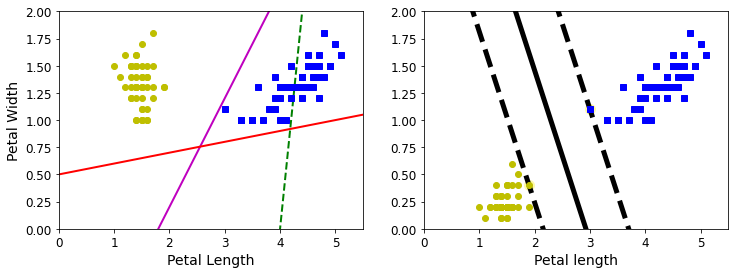

In [21]:
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    '''
    Parameters:
    svm_clf: Support Vector Machine Classifier
    xmin: Minimum of the input feature values
    xmax: Maximum of the input feature values
    '''
    
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    # w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=100, facecolors="#FFFAAA")
    plt.plot(x0, decision_boundary, "k-", linewidth=5)
    plt.plot(x0, gutter_up, "k--", linewidth=5)
    plt.plot(x0, gutter_down, "k--", linewidth=5)
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:,0][y==1], X[:,1][y==1], "bs", label='Iris-Versicolor')
plt.plot(X[:,0][y==0], X[:,1][y==1], "yo", label='Iris-Setosa')

plt.xlabel("Petal Length", fontsize=14)
plt.ylabel("Petal Width", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

## Sensitivity to Feature Scaling

SVM constructs a hyperplane such that it has the largest distance to the nearest data points (called support vectors). If the dimensions have different ranges, the dimension with much bigger range of values influences the distance more than other dimensions. So its necessary to scale the features such that all the features have similar influence when calculating the distance to construct a hyperplane.

Another advantage is to avoid the numerical difficulties during the calculation. Because kernel values usually depend on inner products of features vectors, large attribute values might cause numerical problems. 

SVMs assume that the data it works with is in a standard range, usually either 0 to 1, or -1 to 1 (roughly). So the normalization of feature vectors prior to feeding them to the SVM is very important. (This is often called whitening, although there are different types of whitening.) You want to make sure that for each dimension, the values are scaled to lie roughly within this range. Otherwise, if e.g. dimension 1 is from 0-1000 and dimension 2 is from 0-1.2, then dimension 1 becomes much more important than dimension 2, which will skew results.

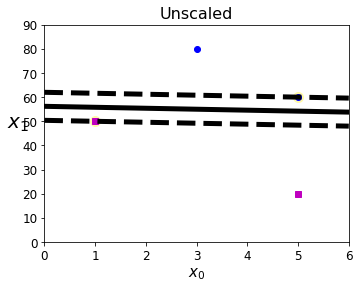

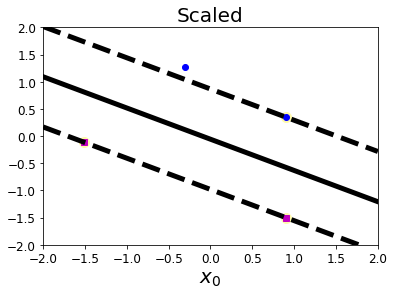

In [27]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=15)
plt.ylabel("$x_1$", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])
plt.show()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.title("Scaled", fontsize=20)
plt.axis([-2, 2, -2, 2])
plt.show()


SVMs are sensitive to the feature scales, as evident from the left plot, the vertical scale is much larger than the horizontal scale, so the widest possible street is close to horizontal. After feature scaling (e.g., using Scikit-Learn’s StandardScaler ), the decision boundary looks much better (on the right plot).

## Hard and Soft Margin Classification

If we separate the classes perfectly without allowing any instance to violate the decision boundary, it leads to hard margin classification. This has two problems associated with them:
1. It is highly sensitive to outliers
2. It works only when the data is linearly separable

To avoid these issues it is preferable to use a more flexible model. The objective is to
find a good balance between keeping the street as large as possible and limiting the
margin violations (i.e., instances that end up in the middle of the street or even on the
wrong side). This is called soft margin classification.

Text(3.2, 0.09, 'Outliers')

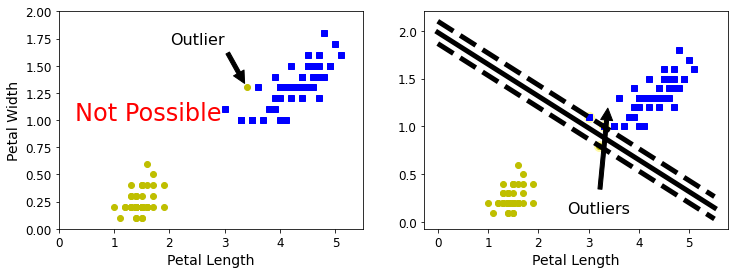

In [29]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])

Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Not Possible", fontsize=24, color="red")
plt.xlabel("Petal Length", fontsize=14)
plt.ylabel("Petal Width", fontsize=14)

plt.annotate("Outlier",
            xy = (X_outliers[0][0], X_outliers[0][1]),
            xytext=(2.5, 1.7),
            ha="center",
            arrowprops=dict(facecolor='black', shrink=0.1),
            fontsize=16)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal Length", fontsize=14)
plt.annotate("Outliers",
            xy = (X_outliers[0][0], X_outliers[0][1]),
            xytext=(3.2, 0.09),
            ha="center",
            arrowprops=dict(facecolor='black', shrink=0.1),
            fontsize=16)
plt.show()

We can control the Decision Boundary for margin violations using the Regularization parameter in SVMs called C hyperparameter:
1. Smaller the value of C, larger number of margin violations because of wider street
2. Larger the value of C, fewer number of margin violations because of smaller street

In [31]:
X = iris["data"][:, (2, 3)] # Petal Length, Petal Width
y = (iris["target"] == 2).astype(np.float64)

smv_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42))
])
svm_clf.fit(X, y)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [32]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [33]:
# Comparison of Classifier with different C-values
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=2, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
    ("scaler", scaler),
    ("linear_svc", svm_clf1)
])
scaled_svm_clf2 = Pipeline([
    ("scaler", scaler),
    ("linear_svc", svm_clf2)
])
scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=2, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [34]:
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

(4.0, 6.0, 0.8, 2.8)

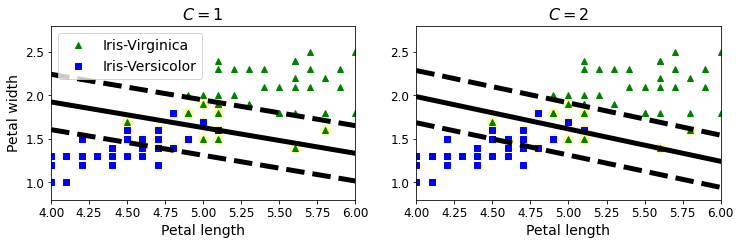

In [35]:


plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

The second classifier has fewer prediction errors despite having more margin violations because the margin violations are generally on the correct side of the decision boundary and thus, it generalizes better than the first classifier 

## Non linear Classification

The dataset are generally not linearly separable, in such a case, we add a new feature such as a polynomial that can make it linearly separable.

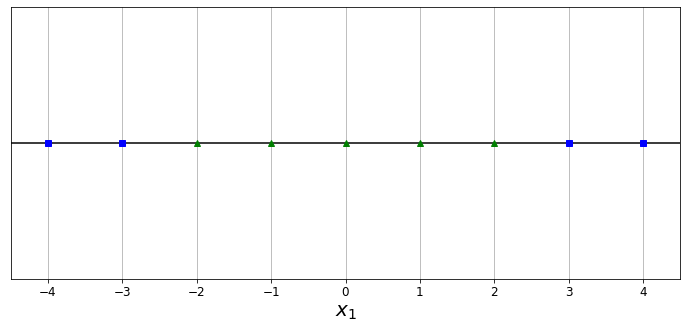

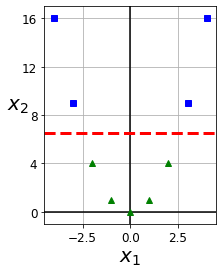

In [37]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(12,5))
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])
plt.show()

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)
plt.show()


In the above figure, we saw the features were not linearly separable as they almost were collinear but when we added a new feature of polynomial, it became easily linearly separable.

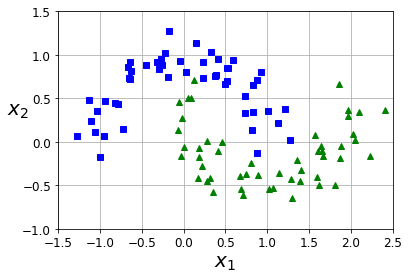

In [39]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [44]:
from sklearn.preprocessing import PolynomialFeatures
poly_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
])
poly_svm_clf.fit(X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

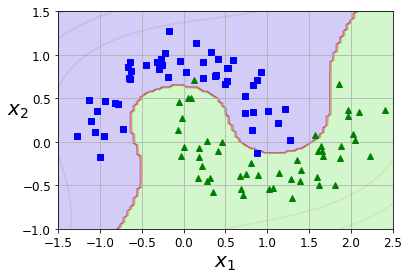

In [47]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contour(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
  
plot_predictions(poly_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()


In [48]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [49]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=100, decision_function_shape='ovr', degree=10,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

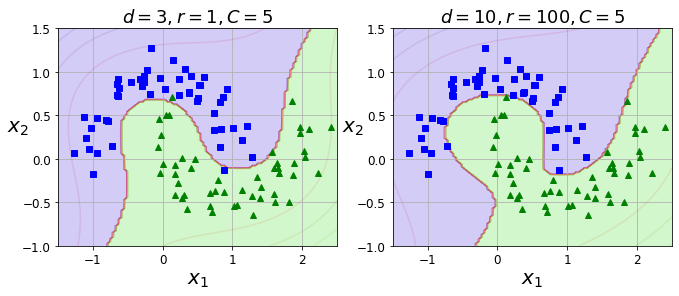

In [51]:


plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.show()

A common approach to find the right hyperparameter values is to
use grid search. It is often faster to first do a very
coarse grid search, then a finer grid search around the best values
found. Having a good sense of what each hyperparameter actually
does can also help you search in the right part of the hyperparame‐
ter space.

- A lower degree polynomial function cannot handle large datasets
- A higher degree polynomial function can handle large datasets
- If model is underfitting, we increase the degree of the polynomial
- If model is overfitting we decrease the degree of the polynomial
- We tune the values of coefficients in order to create the suitable polynomial support vector machine (SVM) classifier

## Adding Similarity Features

- Each data point is compared to a landmark in the nearest location
- Gaussian Radial Basis Function (GRB): φγ x, l = exp −γ∥ x − l ∥^2
    - It is a bell shaped curve with values ranging from 0 to 1.
    - The simplest approach is to create a landmark at the location of each and every instance in the dataset. This creates many dimensions and thus increases the chances that the transformed training set will be linearly separable. The downside is that a training set with m instances and n features gets transformed into a training set with m instances and m features (assuming you drop the original features). If your training set is very large, you end up with an equally large number of features.

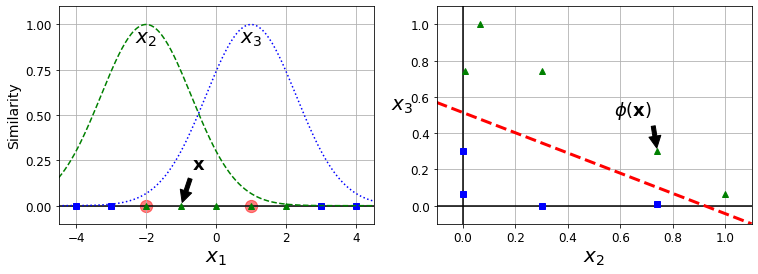

In [53]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)
plt.show()

In [54]:
x1_example = X1D[3, 0]
for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
    print("Phi({}, {}) = {}".format(x1_example, landmark, k))

Phi(-1.0, -2) = [0.74081822]
Phi(-1.0, 1) = [0.30119421]


In [55]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

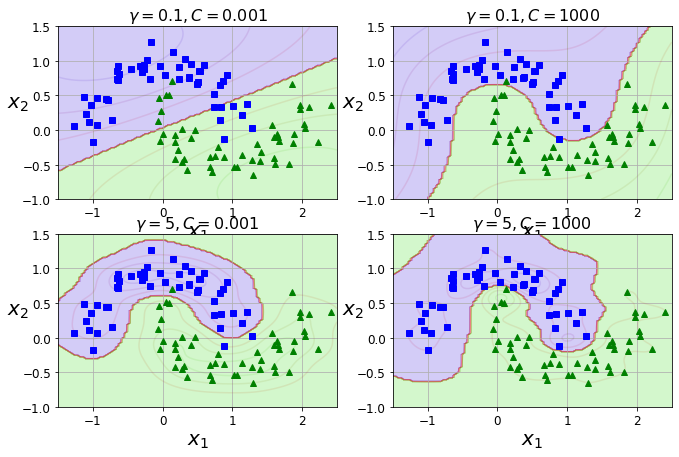

In [58]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
plt.show()

Increasing gamma makes the bell-shape curve narrower, and as a result each instance’s range of influence is smaller: the decision boundary ends up being more irregular, wiggling around individual instances. Conversely, a small gamma value makes the bell-shaped curve wider, so instances have a larger range of influence, and the decision boundary ends up smoother. So γ acts like a regularization hyperparameter: if your model is overfitting, you should reduce it, and if it is under‐fitting, you should increase it (similar to the C hyperparameter).

- Small γ -> Smoother Decision Boundary -> Wider bell curve -> May Underfit
- Large γ -> Wiggling or Irregular Decision Boundary -> Narrower Bell Curve -> May Overfit


In short,
### How to choose a kernel in SVM?

- If the Training Set is Large -> Linear Kernel SVC
- If the Training Set is Small -> Gaussian Radial Basic Kernel SVC

With spared computation power, try rest of the options